# Exploratory Data Analysis

In [3]:
# importing the general dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import warnings

warnings.filterwarnings('ignore')

# check what we have in our dataset


In [4]:
dataset_root = '/kaggle/input/affectnet-yolo-format/YOLO_format/'

for root, directories, files in os.walk(dataset_root):
    # Do something with the current directory path 'root'
    print("Current directory:", root)
    
    # Do something with the list of subdirectories 'directories'
    print("Subdirectories:", directories)
    
    # Do something with the list of files 'files'
    print("Files:", len(files))

Current directory: /kaggle/input/affectnet-yolo-format/YOLO_format/
Subdirectories: ['valid', 'test', 'train']
Files: 1
Current directory: /kaggle/input/affectnet-yolo-format/YOLO_format/valid
Subdirectories: ['labels', 'images']
Files: 0
Current directory: /kaggle/input/affectnet-yolo-format/YOLO_format/valid/labels
Subdirectories: []
Files: 5406
Current directory: /kaggle/input/affectnet-yolo-format/YOLO_format/valid/images
Subdirectories: []
Files: 5406
Current directory: /kaggle/input/affectnet-yolo-format/YOLO_format/test
Subdirectories: ['labels', 'images']
Files: 0
Current directory: /kaggle/input/affectnet-yolo-format/YOLO_format/test/labels
Subdirectories: []
Files: 2755
Current directory: /kaggle/input/affectnet-yolo-format/YOLO_format/test/images
Subdirectories: []
Files: 2755
Current directory: /kaggle/input/affectnet-yolo-format/YOLO_format/train
Subdirectories: ['labels', 'images']
Files: 0
Current directory: /kaggle/input/affectnet-yolo-format/YOLO_format/train/labels
Su

# Observe some images from three folders


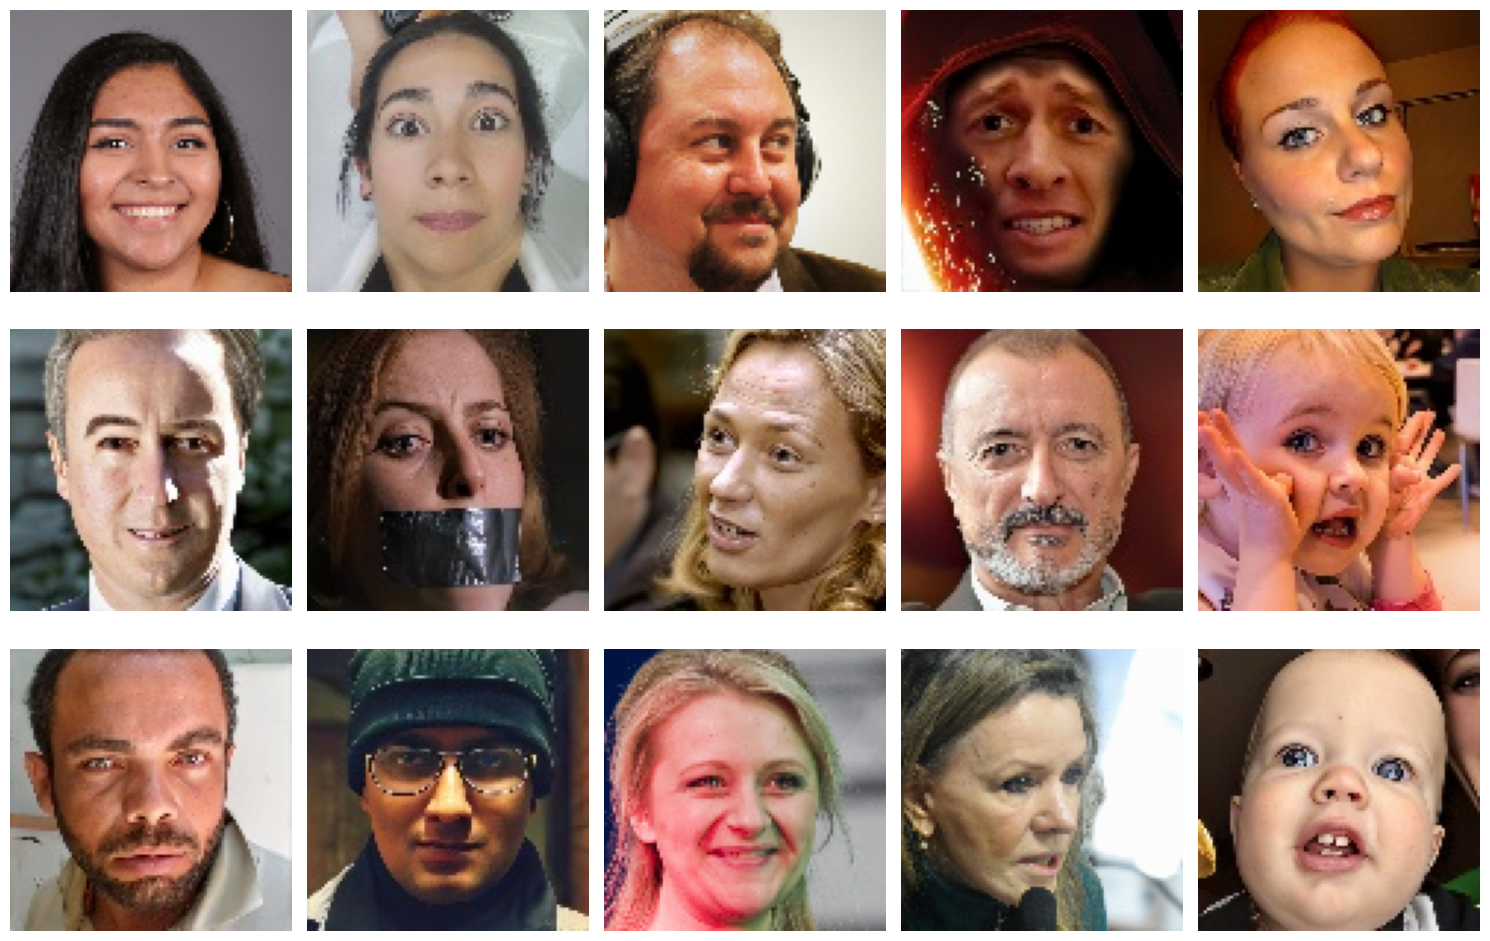

In [5]:

# Define the paths to the image folders
image_folders = [
    "/kaggle/input/affectnet-yolo-format/YOLO_format/valid/images",
    "/kaggle/input/affectnet-yolo-format/YOLO_format/test/images",
    "/kaggle/input/affectnet-yolo-format/YOLO_format/train/images"
]

# Define the number of images you want to display from each folder
num_images_per_folder = 5

# Create a subplot grid
fig, axes = plt.subplots(len(image_folders), num_images_per_folder, figsize=(15, 10))

# Loop through each image folder
for i, folder in enumerate(image_folders):
    image_files = os.listdir(folder)[:num_images_per_folder]  # Get the list of image files
    for j, image_file in enumerate(image_files):
        image_path = os.path.join(folder, image_file)
        try:
            # Open and display the image
            img = plt.imread(image_path)
            axes[i, j].imshow(img)
            axes[i, j].axis('off')
        except Exception as e:
            print(f"Error opening image: {image_path}")

# Adjust layout
plt.tight_layout()
plt.show()

# Observe an individual image with its corresponding label


/kaggle/input/affectnet-yolo-format/YOLO_format/train/labels/ffhq_5410.txt
/kaggle/input/affectnet-yolo-format/YOLO_format/train/images/ffhq_5410.png


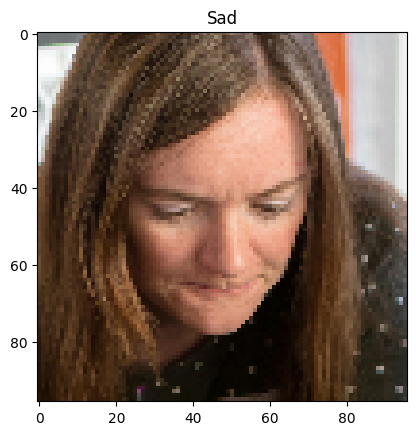

In [6]:
labels_map = {
    '0' : 'Anger',
    '1' : 'Contempt',
    '2' : 'Disgust',
    '3' : 'Fear',
    '4' : 'Happy',
    '5' : 'Neutral',
    '6' : 'Sad',
    '7' : 'Surprise'
}

random_number = 333
train_images_path = '/kaggle/input/affectnet-yolo-format/YOLO_format/train/images'
random_image_path = os.path.join(train_images_path, os.listdir(train_images_path)[random_number])
random_image = plt.imread(random_image_path)

train_labels_path = '/kaggle/input/affectnet-yolo-format/YOLO_format/train/labels'
random_label_file = random_image_path.split('/')[-1].split('.')[0] + '.txt'
random_label_path = os.path.join(train_labels_path, random_label_file)

with open(random_label_path, 'r') as file:
    # first character is the label
    first_character = file.read(1)
image_class = labels_map[first_character]

print(random_label_path)
print(random_image_path)

plt.imshow(random_image)
plt.title(f'{image_class}')
plt.show()

# Distribution of all the data

In [11]:
def count_freq(label_folders):
    # Class frequencies
    class_frequencies = np.array([])
    # Iterate over each label directory (valid, test, train)
    for label_dir in label_folders:
        
        # Iterate over each .txt file in the labels directory
        for file_name in os.listdir(label_dir):
            if file_name.endswith('.txt'):
                file_path = os.path.join(label_dir, file_name)
                
                # Read the first character of the file
                with open(file_path, 'r') as file:
                    first_character = file.read(1)
            
            class_frequencies = np.append(class_frequencies, first_character)
    return class_frequencies

In [13]:
labels_map = {
    '0' : 'Anger',
    '1' : 'Contempt',
    '2' : 'Disgust',
    '3' : 'Fear',
    '4' : 'Happy',
    '5' : 'Neutral',
    '6' : 'Sad',
    '7' : 'Surprise'
}

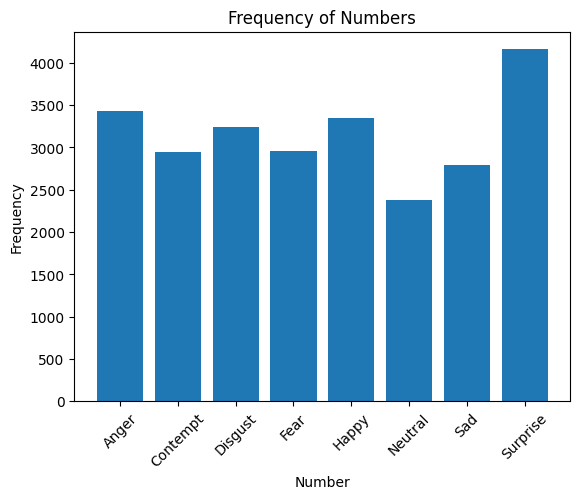

In [16]:
# Define the paths to the image folders
label_folders = [
    "/kaggle/input/affectnet-yolo-format/YOLO_format/valid/labels",
    "/kaggle/input/affectnet-yolo-format/YOLO_format/test/labels",
    "/kaggle/input/affectnet-yolo-format/YOLO_format/train/labels"
]

class_frequencies = count_freq(label_folders)
unique, counts = np.unique(class_frequencies, return_counts=True)
unique_mapped = [labels_map[x] for x in unique]

# Create the bar plot
plt.bar(unique_mapped, counts)

# Add labels and title
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.title('Frequency of Numbers')
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Distribution of Trainning Data

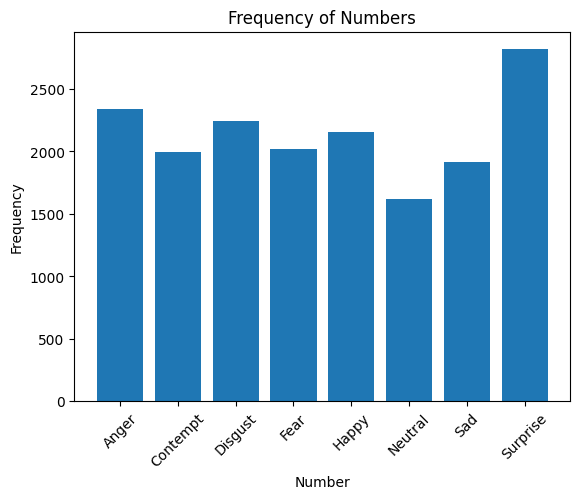

In [18]:
# Define the paths to the image folders
label_folders = [
    "/kaggle/input/affectnet-yolo-format/YOLO_format/train/labels"
]

class_frequencies = count_freq(label_folders)
unique, counts = np.unique(class_frequencies, return_counts=True)
unique_mapped = [labels_map[x] for x in unique]

# Create the bar plot
plt.bar(unique_mapped, counts)

# Add labels and title
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.title('Frequency of Numbers')
plt.xticks(rotation=45)

# Show the plot
plt.show()

# Balance Trainning Data

In [10]:
import os
import random
import shutil
from collections import defaultdict

# Define directories
train_image_dir = '/kaggle/input/affectnet-yolo-format/YOLO_format/train/images'
train_label_dir = '/kaggle/input/affectnet-yolo-format/YOLO_format/train/labels'

# Define output directories where the balanced dataset will be saved
output_image_dir = '/kaggle/working/balanced_train_images'
output_label_dir = '/kaggle/working/balanced_train_labels'

# Create output directories if they do not exist
os.makedirs(output_image_dir, exist_ok=True)
os.makedirs(output_label_dir, exist_ok=True)


# Initialize a dictionary to count occurrences of each class
class_counter = defaultdict(list)
image_to_labels = {}

# Parse the label files and count occurrences of each class
for file_name in os.listdir(train_label_dir):
    if file_name.endswith('.txt'):
        file_path = os.path.join(train_label_dir, file_name)
        with open(file_path, 'r') as file:
            lines = file.readlines()
            for line in lines:
                class_id = line.split()[0]  # The first value is the class ID
                class_counter[class_id].append(file_name)

# Get the minimum count of instances across all classes to use as the target for balancing
min_class_count = min(len(files) for files in class_counter.values())

# Create a set of files to include in the balanced dataset
files_to_include = set()

# Loop through each class and select the required number of files (min_class_count)
for class_id, file_list in class_counter.items():
    # Randomly select min_class_count files from each class
    selected_files = random.sample(file_list, min_class_count)
    files_to_include.update(selected_files)

# Copy the selected images and labels to the new output directory
for file in files_to_include:
    image_path = os.path.join(train_image_dir, file.replace('.txt', '.jpg'))  # Assuming images are .jpg
    label_path = os.path.join(train_label_dir, file)

    # Copy image and label to the new directories
    if os.path.exists(image_path):
        shutil.copy(image_path, output_image_dir)  # Copy image
    if os.path.exists(label_path):
        shutil.copy(label_path, output_label_dir)  # Copy label

print(f"Balanced dataset created with {len(files_to_include)} images and labels in {output_image_dir} and {output_label_dir}.")


Balanced dataset created with 12928 images and labels in /kaggle/working/balanced_train_images and /kaggle/working/balanced_train_labels.


# Distribution of Balanced Data

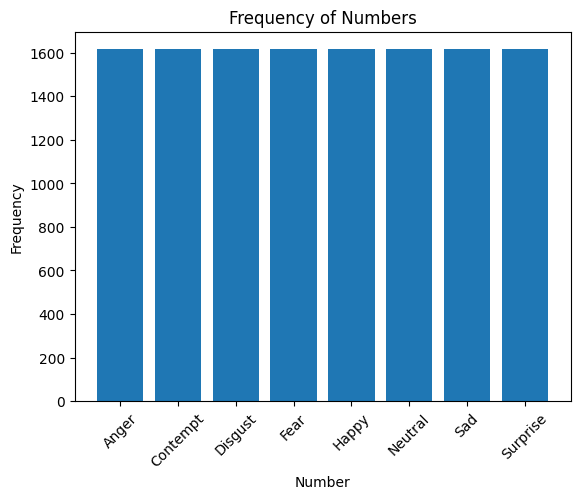

In [17]:
# Define the paths to the image folders
label_folders = [
    "/kaggle/working/balanced_train_labels"
]

class_frequencies = count_freq(label_folders)
unique, counts = np.unique(class_frequencies, return_counts=True)
unique_mapped = [labels_map[x] for x in unique]

# Create the bar plot
plt.bar(unique_mapped, counts)

# Add labels and title
plt.xlabel('Number')
plt.ylabel('Frequency')
plt.title('Frequency of Numbers')
plt.xticks(rotation=45)

# Show the plot
plt.show()